<a href="https://colab.research.google.com/github/PValsted/MLA_PV/blob/main/MLA5_PV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# Machine Learning Assignment 5 #  
**Patrick Valsted**  

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [27]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

## Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [8]:
landsat_train=pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_train.csv')
landsat_test=pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_test.csv')

### Statistical and Visual Exploration

In [9]:
landsat_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [10]:
landTypeTrainCount = landsat_train['land_type'].groupby(landsat_train['land_type']).count()
landTypeTestCount = landsat_test['land_type'].groupby(landsat_test['land_type']).count()

<Axes: title={'center': 'Number of Land Types (Training Set)'}, xlabel='land_type'>

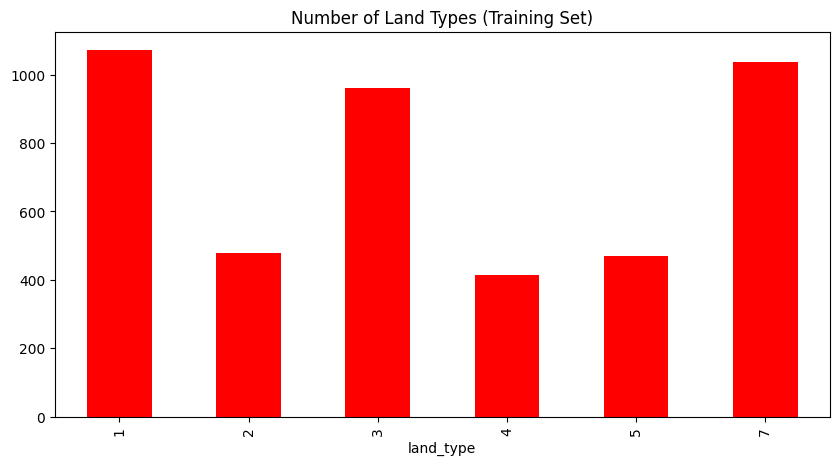

In [11]:
landTypeTrainCount.plot(kind='bar', color='red', title='Number of Land Types (Training Set)', figsize=(10,5))

<Axes: title={'center': 'Number of Land Types (Testing Set)'}, xlabel='land_type'>

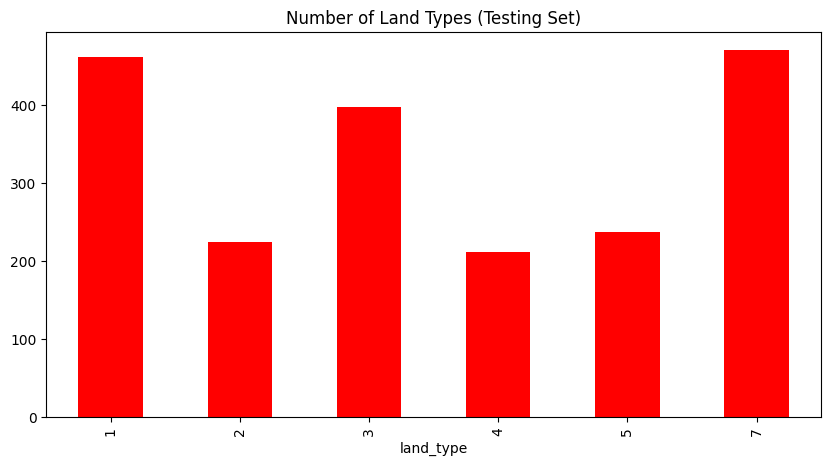

In [12]:
landTypeTestCount.plot(kind='bar', color='red', title='Number of Land Types (Testing Set)', figsize=(10,5))

### Splitting Data into Train/Test

In [13]:
X_train = landsat_train.iloc[:,0:-1]
X_test = landsat_test.iloc[:,0:-1]
y_train = landsat_train['land_type']
y_test = landsat_test['land_type']

### Building the Pipeline

In [14]:
num_attribs = slice(0,37)

In [15]:
col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(), num_attribs),],
                  )

In [16]:
random_forest = Pipeline([
                     ('transform', col_transform),
                     ('rf',RandomForestClassifier(n_estimators=1000, max_samples=4435, bootstrap=True, n_jobs=-1))
                     ])

### Executing the Model

In [17]:
random_forest.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  slice(0, 37, None))])),
                ('rf',
                 RandomForestClassifier(max_samples=4435, n_estimators=1000,
                                        n_jobs=-1))])

### Evaluating Model

In [18]:
y_pred= random_forest.predict(X_test)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       461
           2       0.98      0.98      0.98       224
           3       0.89      0.95      0.92       397
           4       0.78      0.64      0.70       211
           5       0.92      0.90      0.91       237
           7       0.88      0.90      0.89       470

    accuracy                           0.91      2000
   macro avg       0.91      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



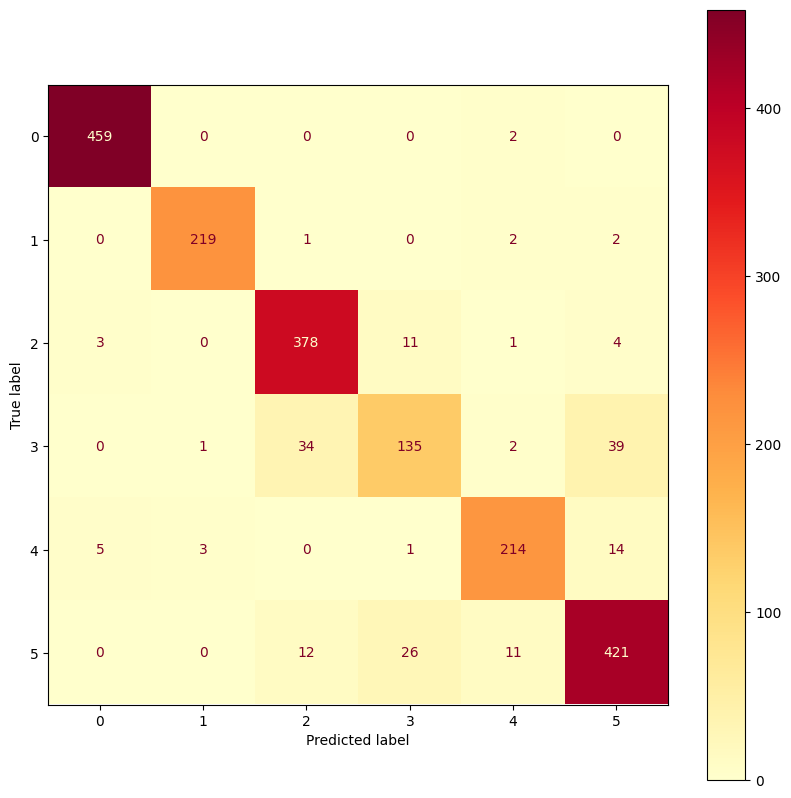

In [20]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap='YlOrRd')

### Conclusion
In general, this model is excellent at predicting land type. We can see from the classification report that for every land type except for type 4, the scores are excellent and pretty close to 1. Even 4 isn't horrible. The confusion matrix helps us visualize the numbers; the diagonal values (the ones we care about) are all pretty high up there as the heatmap demonstrates.

## Problem 2

### Building the Pipeline

In [43]:
bag = Pipeline([
                     ('transform', col_transform),
                     ('bag',BaggingClassifier(DecisionTreeClassifier(),n_estimators=1000, max_samples=4000, bootstrap=True, n_jobs=-1))
                     ])

### Executing the Model

In [44]:
bag.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  slice(0, 37, None))])),
                ('bag',
                 BaggingClassifier(estimator=DecisionTreeClassifier(),
                                   max_samples=4000, n_estimators=1000,
                                   n_jobs=-1))])

### Evaluating Model

In [46]:
y_pred= bag.predict(X_test)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.97      0.98      0.98       461
           2       0.98      0.98      0.98       224
           3       0.87      0.94      0.91       397
           4       0.73      0.62      0.67       211
           5       0.93      0.86      0.90       237
           7       0.87      0.89      0.88       470

    accuracy                           0.90      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.90      0.90      0.90      2000



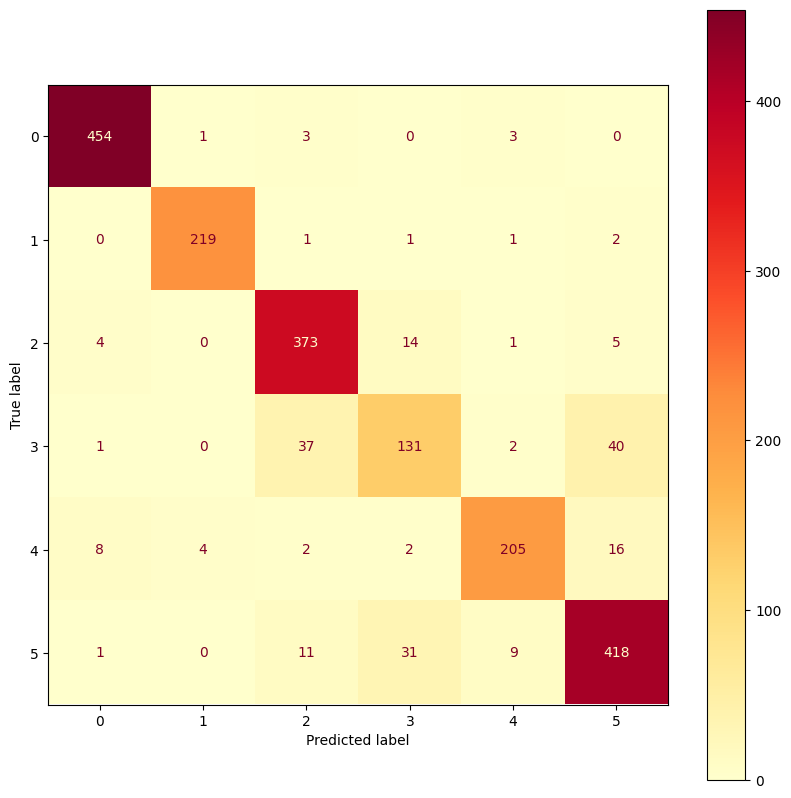

In [48]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap='YlOrRd')

### Conclusion
Running the Decision Tree model with a Bagging Classifier didn't make much of a difference in the results with this dataset. It performed very slightly worse, with scores that are about 0.01 lower in general. These results are still good results, making the Bagging Classifier combo a pretty good model, just not as good as the RandomForestClassification model.

## Problem 3

### Reading the Data

In [49]:
df=pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

### Splitting Data into Train/Test

In [50]:
X = df[['variance','skewness','curtosis','entropy']]
y = df['forgery']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=32)

### Building the Pipeline

In [52]:
num_attribs = ['variance','skewness','curtosis','entropy']

In [53]:
col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(), num_attribs),],
                  )

In [61]:
random_forest = Pipeline([
                     ('transform', col_transform),
                     ('rf',RandomForestClassifier(n_estimators=1000, bootstrap=True, n_jobs=-1))
                     ])

### Executing the Model

In [62]:
random_forest.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('rf', RandomForestClassifier(n_estimators=1000, n_jobs=-1))])

### Evaluating Model

In [63]:
y_pred= random_forest.predict(X_test)

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       156
           1       0.98      1.00      0.99       119

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



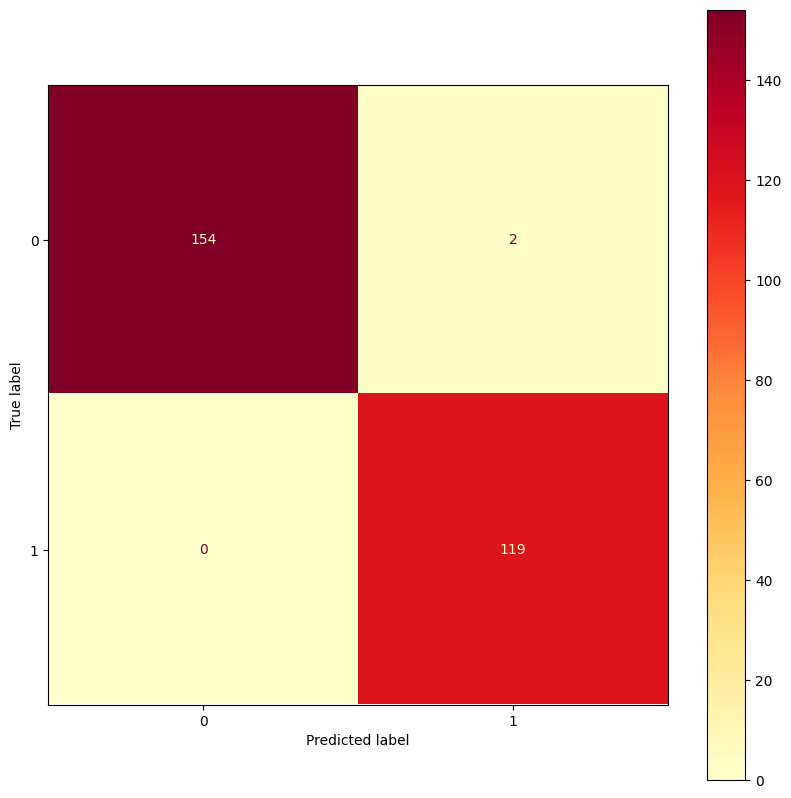

In [65]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap='YlOrRd')

### Conclusion
The RandomForestClassification model was fantastic at predicting forgeries vs non-forgeries, better than all the previous models used on this dataset. It perfectly predicted the 0 values and only missed 2 of the 1 values, meaning it's almost perfect. We get this visually from the ConfusiuonMatricDisplay function and the classification_report score values.